# **Rede Neural Convolucional MobileNet**

**1- Importação de Biliotecas**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np 
import pandas as pd 
from IPython.display import display, Image 
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.image as mpimg
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model

import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image, display
import random, os

**2- Instação do Kaggle**

In [ ]:
!pip install -q kaggle

**3- Importação do Arquivo Json Kaggle**

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saulohenriaguiar","key":"f39a97212cfdbde2b816fdffcb292e24"}'}

**4- Criação pasta no drive arquivo kaggle**

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**5- Baixar o dataset direto do kaggle**

In [ ]:
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:05<00:00, 29.5MB/s]
100% 3.58G/3.58G [01:05<00:00, 58.3MB/s]


**6- Extrai arquivos Zip(dataset)**

In [ ]:
!unzip fruits-fresh-and-rotten-for-classification.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 20

**7- Obtem os rotulos dos dados de treinamento**

In [ ]:
labels = os.listdir('/content/dataset/train')
labels

['rottenoranges',
 'freshapples',
 'rottenbanana',
 'freshoranges',
 'rottenapples',
 'freshbanana']

**8- Mostra de forma aleatória algumas imagens de treinamento e tambem o tamanho de cada pasta de frutas de treinamento**


 ROTTENORANGES


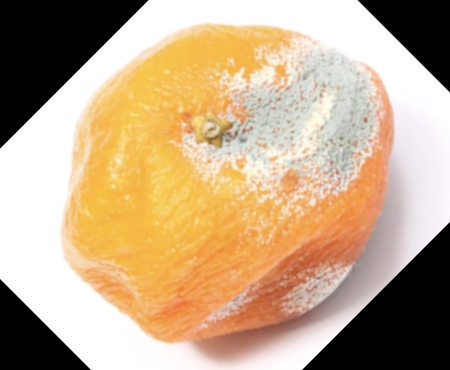

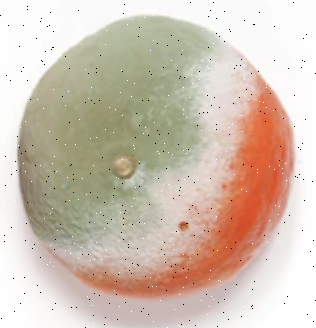

there are  1595  images in  rottenoranges class

 FRESHAPPLES


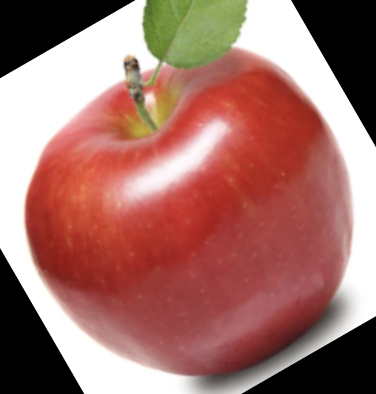

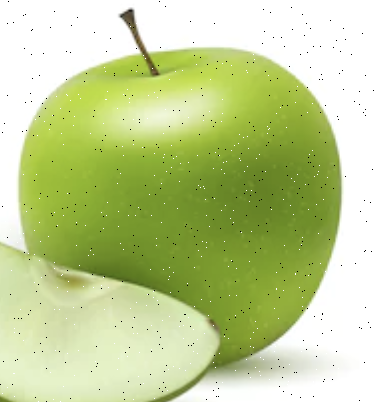

there are  1693  images in  freshapples class

 ROTTENBANANA


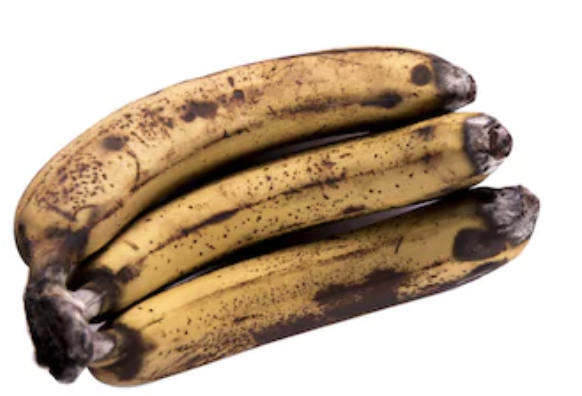

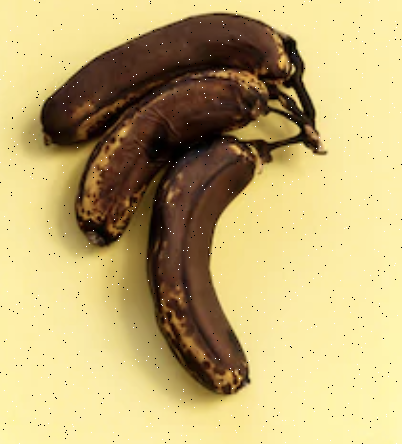

there are  2224  images in  rottenbanana class

 FRESHORANGES


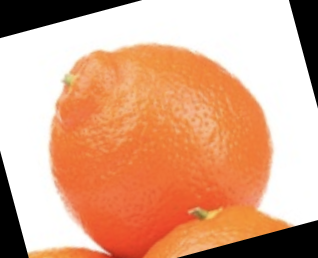

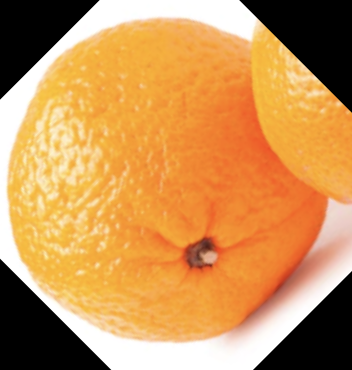

there are  1466  images in  freshoranges class

 ROTTENAPPLES


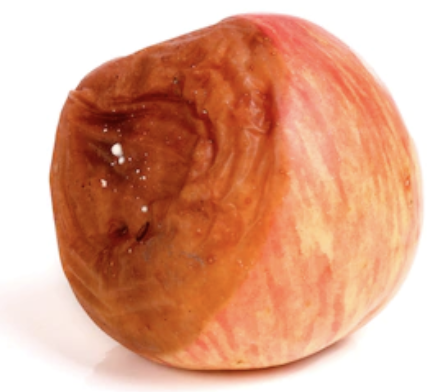

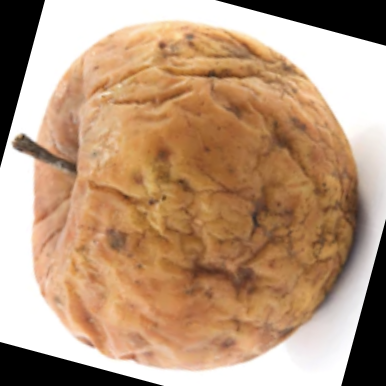

there are  2342  images in  rottenapples class

 FRESHBANANA


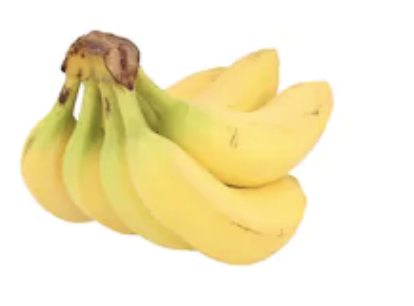

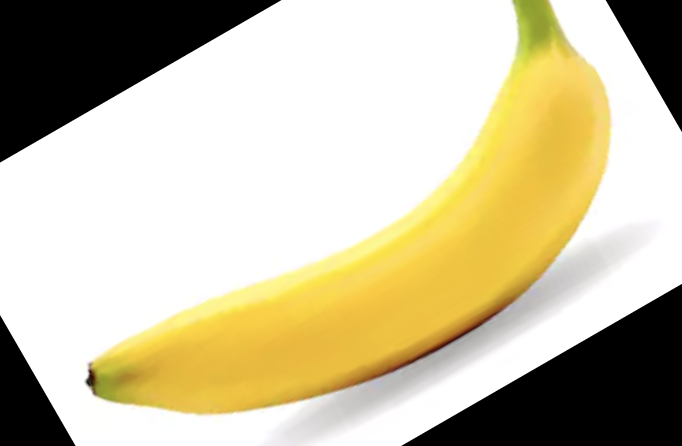

there are  1581  images in  freshbanana class


In [ ]:
num = []

for i in labels:
  path = '/content/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

**9-Divide os diretórios treinamento e validação(treino/teste)**

In [ ]:
train_dir = os.path.join('/content/dataset/train', 'train')
validation_dir = os.path.join('/content/dataset/test', 'validation')

**10- Lista as classes do Treino**

In [ ]:
!ls /content/dataset/test

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


**11-Verifica a quantidade de imagens do teste**

In [ ]:
test_imgs_count = sum([len(files) for r, d, files in os.walk("/content/dataset/test")])
test_imgs_count

2698

**12-Verifica a quantidade de imagens do treino**

In [ ]:
train_imgs_count = sum([len(files) for r, d, files in os.walk("/content/dataset/train")])
train_imgs_count

10901

**13- Tamanho do Lote**

In [ ]:
#modificar pra ver o resultado!!!
batch_size_train = 71
batch_size_test = 1

**14- Verificar imagens**

In [ ]:
def display20randomimages(t):
  fig=plt.figure(figsize=(8, 8))
  columns = 4
  rows = 5
  for i in range(1, columns*rows +1):
    c = "/" + str(random.choice([0,1,2,3,4,5,6,7])) + "/"
    random_filename = random.choice([
        x for x in os.listdir(t + c)
        if os.path.isfile(os.path.join(t+c, x))
    ])
    img = mpimg.imread(t+c+random_filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()

**15- Reescalona os dados de treino**

In [ ]:
train_datagen = ImageDataGenerator()


**16- Reescalona os dados do teste**

In [ ]:
test_datagen = ImageDataGenerator()

**17- Mostra dimensão das imagens**

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

**18- Definição de dados de treino**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=r'/content/dataset/train',
    target_size=(160, 160),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 10901 images belonging to 6 classes.


**19- Definição de dados de teste**

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=r'/content/dataset/test',
    target_size=(160, 160),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 2698 images belonging to 6 classes.


**20- Definições**

In [ ]:
inp = Input(shape = (160,160,3))

In [ ]:
base_learning_rate = 0.0001

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

**21- Importação da MobileNetV2**

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing import image

**22- Carregamento de MobileNetV2**

In [ ]:
model_mobile = MobileNetV2(input_shape=(160,160,3), include_top=False, weights='imagenet')
model_mobile.trainable = False #conlega algumas camadas(só treina o topo da rede)

model_mobile.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
________________

**23- Adiciona Algumas Camadas a Rede Mobilenet**

In [ ]:
x = preprocess_input(inp)
x1 = model_mobile(x, training=False)
x2 = GlobalAveragePooling2D()(x1)
x3 = Dropout(rate=0.5)(x2)
x4 = Dense(512, activation='relu')(x3)
x5 = Dense(128, activation='relu')(x4)
out = Dense(6, activation='softmax')(x5)

**24- Compila Modelo MobileNetV2 com novas camadas**

In [ ]:
model_mobile = Model(inputs = inp, outputs = out)
model_mobile.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872

**25- Otimizadores da Rede**

In [ ]:
model_mobile.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

**26- Treina a CNN**

In [ ]:
history = model_mobile.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=17,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_TEST

)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/17
340/340 [==============================] - 65s 191ms/step - loss: 0.1848 - accuracy: 0.9343 - val_loss: 0.0717 - val_accuracy: 0.9773
Epoch 2/17
340/340 [==============================] - 64s 187ms/step - loss: 0.0891 - accuracy: 0.9680 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 3/17
340/340 [==============================] - 64s 189ms/step - loss: 0.0716 - accuracy: 0.9734 - val_loss: 0.0373 - val_accuracy: 0.9862
Epoch 4/17
340/340 [==============================] - 64s 189ms/step - loss: 0.0564 - accuracy: 0.9796 - val_loss: 0.0609 - val_accuracy: 0.9784
Epoch 5/17
340/340 [==============================] - 64s 189ms/step - loss: 0.0457 - accuracy: 0.9838 - val_loss: 0.0213 - val_accuracy: 0.9929
Epoch 6/17
340/340 [==============================] - 64s 189ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0285 - val_accuracy: 0.9929
Epoch 7/17
340/340 [==============================] - 64s 189ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0282 - val_ac

**27- Treina Modelo Preditivo**

In [ ]:
predgen = model_mobile.predict_generator(test_generator, steps=len(test_generator), verbose=1) 
pred = np.argmax(predgen,axis = 1)
y_true=test_generator.classes

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


85/85 [==============================] - 13s 141ms/step


**28-Matriz Confusão**

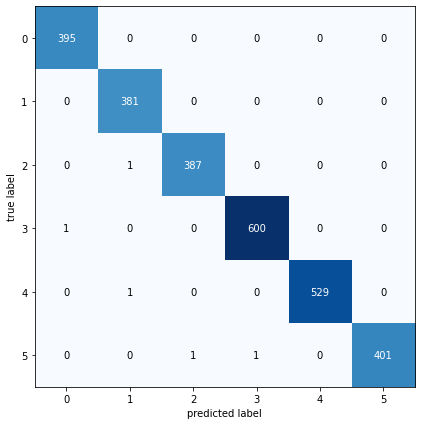

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(15, 7))
plt.show()

**29- Métricas**

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, pred))#, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       0.99      1.00      1.00       381
           2       1.00      1.00      1.00       388
           3       1.00      1.00      1.00       601
           4       1.00      1.00      1.00       530
           5       1.00      1.00      1.00       403

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698



**30- Avaliando (Loss=Perda)**

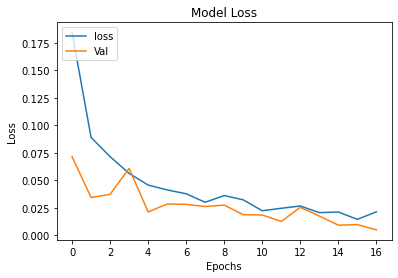

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

**31- Avaliando (Acurácia=Acerto)**

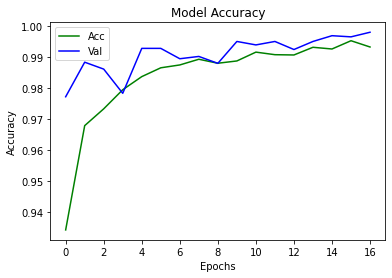

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')